# Test cases

In [2]:
from tfgpkg.preproc.line import LineSegmentation
from tfgpkg.preproc.binarize import IlluminationBinarizer
import pkg_resources
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

plt.rcParams['figure.figsize'] = 10, 10

In [3]:
root_folder = pkg_resources.resource_filename("tfgpkg.test", "")
img_dir = f"{root_folder}{os.sep}resources{os.sep}preproc{os.sep}paragraphs{os.sep}"
img_files = [f"{img_dir}{os.sep}{x}" for x in os.listdir(img_dir) if "png" in x or "jpg" in x]

print(os.listdir(img_dir)[1:])

['easy1.png', 'easy2.png', 'easy3.png', 'easy4.png', 'extreme_hard.jpg', 'hard1.jpg', 'hard2.jpg', 'hard3.jpg', 'hard4.jpg', 'hard5.jpg', 'medium1.png', 'medium2.png', 'medium3.png', 'medium4.png', 'medium5.png', 'medium6.png', 'medium7.png']


251.1067028539449


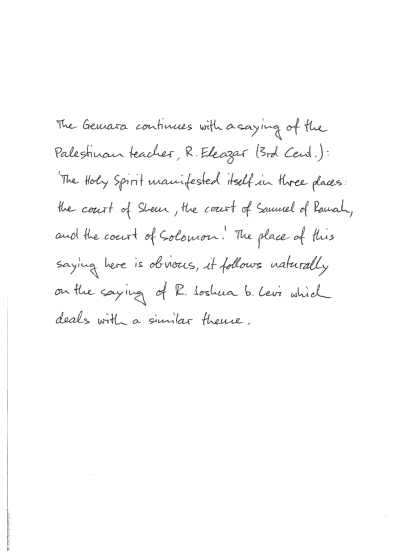

In [49]:
img = cv2.imread(img_files[-1])
img = IlluminationBinarizer.illumination_compensation(img, as_bin=True, upper_value=255)

print(np.average(img.flatten()))

plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

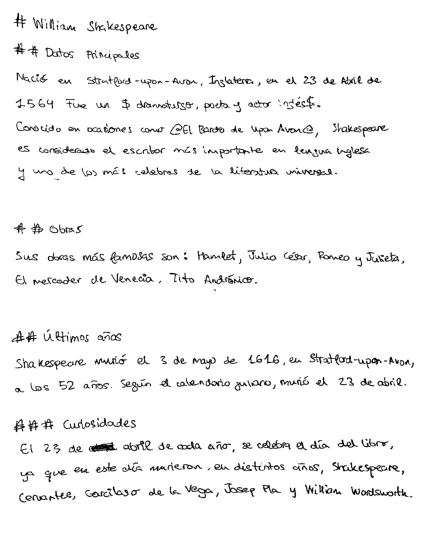

In [45]:
extra_image = cv2.imread("../../data-sources/spanish-words-originals/test3_mini_lowq_bin.jpg")
img = IlluminationBinarizer.illumination_compensation(extra_image, as_bin=True, upper_value=255)

plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

In [41]:
%%time

lines = LineSegmentation(img).find_lines()

Wall time: 786 ms


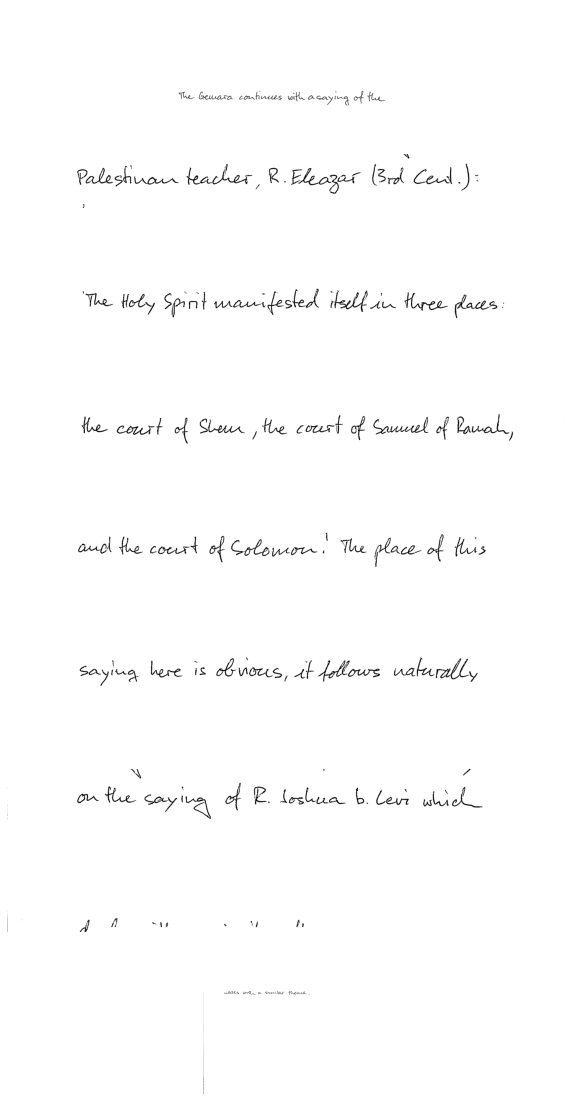

In [42]:
def plot_lines(lines):
    _, axes = plt.subplots(len(lines), 1, figsize=(10,20))

    if len(lines) > 1:
        axes.flatten()

        for i, (line_img, _) in enumerate(lines):
            axes[i].imshow(line_img, cmap="gray")
            axes[i].axis("off")
    else:
        plt.imshow(lines[0][0], cmap="gray")
        plt.axis("off")

    plt.show()
     
        
plot_lines(lines)

---

In [72]:
from time import time
from random import randint

img_files2 = img_files + ["../../data-sources/spanish-words-originals/test3_mini_lowq_bin.jpg"]
results = []
used_pos = []

(738, 640)


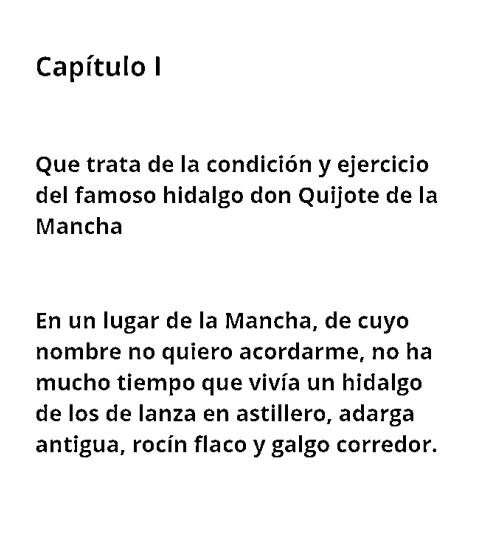

In [103]:
next_pos = randint(0, len(img_files2))

while next_pos in used_pos and len(used_pos) != len(img_files2):
    next_pos = randint(0, len(img_files2))
    
used_pos.append(next_pos)

img = cv2.imread(img_files2[next_pos])
img_bin = IlluminationBinarizer.illumination_compensation(img, as_bin=True, upper_value=255)

print(img_bin.shape)

plt.imshow(img_bin, cmap="gray")
plt.axis("off")
plt.show()

In [104]:
%%timeit
lines = LineSegmentation(img_bin).find_lines()

187 ms ± 12.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [106]:
%%timeit
lines = LineSegmentation(img).find_lines(debug=True)

3.9 s ± 296 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


(738, 640)


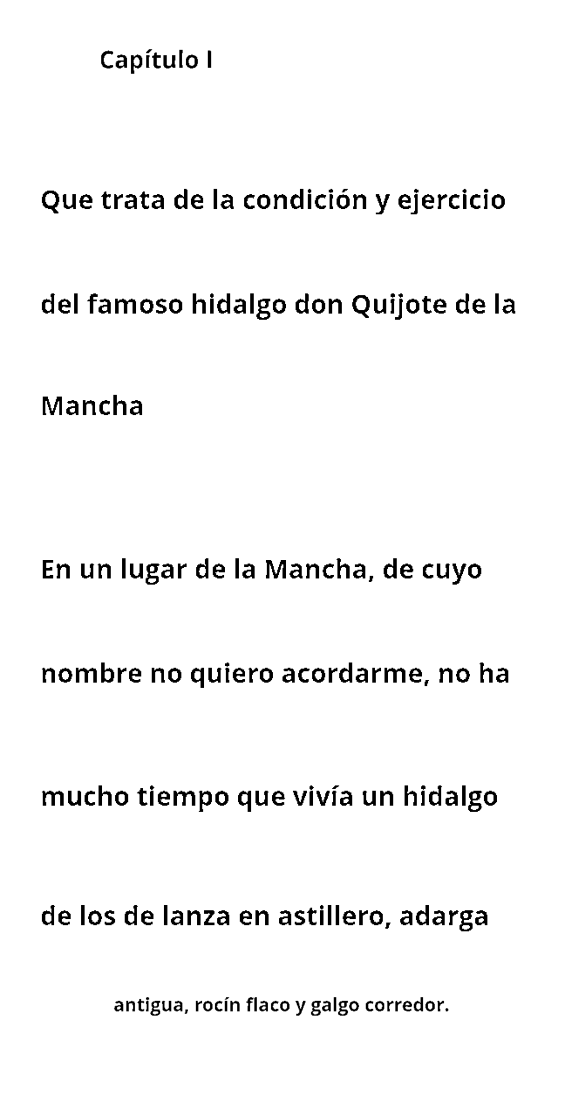

In [105]:
print(img_bin.shape)

lines = LineSegmentation(img_bin).find_lines()
plot_lines(lines)